In [83]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

TensorFlow is already loaded. Please restart the runtime to change versions.


In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
df = pd.read_csv("drive/My Drive/imdb_master.csv",encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values


   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


tokenizing data

In [0]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

getting the vocabulary of data


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)

In [88]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [62]:
model = Sequential()
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 5s 66us/step - loss: 0.8787 - acc: 0.5046 - val_loss: 0.8433 - val_acc: 0.5131
Epoch 2/5
75000/75000 [==============================] - 5s 63us/step - loss: 0.7922 - acc: 0.5757 - val_loss: 0.8412 - val_acc: 0.5141
Epoch 3/5
75000/75000 [==============================] - 5s 63us/step - loss: 0.6956 - acc: 0.6703 - val_loss: 0.8675 - val_acc: 0.5123
Epoch 4/5
75000/75000 [==============================] - 5s 63us/step - loss: 0.5144 - acc: 0.8024 - val_loss: 0.9364 - val_acc: 0.5123
Epoch 5/5
75000/75000 [==============================] - 5s 63us/step - loss: 0.3072 - acc: 0.9152 - val_loss: 1.0635 - val_acc: 0.4960


In [63]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)


176408
2470


In [0]:
# from keras.layers import Embedding
# X_train.shape


In [0]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [65]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 264s 4ms/step - loss: 0.9869 - acc: 0.4879 - val_loss: 0.8724 - val_acc: 0.4969
Epoch 2/5
75000/75000 [==============================] - 264s 4ms/step - loss: 0.7900 - acc: 0.5821 - val_loss: 0.8659 - val_acc: 0.4956
Epoch 3/5
75000/75000 [==============================] - 266s 4ms/step - loss: 0.6407 - acc: 0.7031 - val_loss: 0.9684 - val_acc: 0.4880
Epoch 4/5
75000/75000 [==============================] - 263s 4ms/step - loss: 0.4658 - acc: 0.8066 - val_loss: 1.1989 - val_acc: 0.4830
Epoch 5/5
75000/75000 [==============================] - 266s 4ms/step - loss: 0.3254 - acc: 0.8768 - val_loss: 1.4127 - val_acc: 0.4802


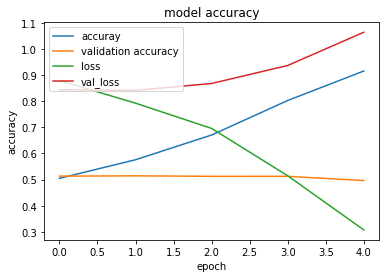

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [0]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)


In [0]:
sentences= twenty_train.data
y=twenty_train.target

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)


In [0]:
from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [71]:
h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 144s 17ms/step - loss: 12.6910 - acc: 0.0504 - val_loss: 3.1087 - val_acc: 0.0643
Epoch 2/5
8485/8485 [==============================] - 141s 17ms/step - loss: 3.0027 - acc: 0.0560 - val_loss: 3.0099 - val_acc: 0.0633
Epoch 3/5
8485/8485 [==============================] - 140s 17ms/step - loss: 2.9602 - acc: 0.0681 - val_loss: 2.9734 - val_acc: 0.0657
Epoch 4/5
8485/8485 [==============================] - 141s 17ms/step - loss: 2.9276 - acc: 0.0774 - val_loss: 2.9390 - val_acc: 0.0703
Epoch 5/5
8485/8485 [==============================] - 140s 17ms/step - loss: 2.8761 - acc: 0.0922 - val_loss: 2.8905 - val_acc: 0.0852


In [0]:
x=model.predict_classes(X_test[[2],:])

In [100]:
print("Actual Prediction",y_test[1],"Predicted Prediction",x)

Actual Prediction 2 Predicted Prediction [2]


In [101]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/logs/{}".format(time()))
model.fit(X_train,y_train,verbose=1,callbacks=[tensorboard], epochs=5)

Epoch 1/5
75000/75000 [==============================] - 16s 212us/step - loss: 0.0441 - acc: 0.9899
Epoch 2/5
75000/75000 [==============================] - 16s 210us/step - loss: 0.0449 - acc: 0.9893
Epoch 3/5
75000/75000 [==============================] - 16s 208us/step - loss: 0.0385 - acc: 0.9907
Epoch 4/5
75000/75000 [==============================] - 16s 209us/step - loss: 0.0379 - acc: 0.9908
Epoch 5/5
75000/75000 [==============================] - 16s 210us/step - loss: 0.0380 - acc: 0.9902
